# Table of Contents
* [Introduction](#section-1)
* [Ask](#section-2)
* [Prepare](#section-3)
* [Process](#section-4)
* [Analyze](#section-5)
* [Act](#section-7)

<a id="section-1"></a>
# Introduction
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. 

I will use this US-Accidents dataset to extract cause that contribute to car accidents and how different factors affect the severity of the accidents differently.


<a id="section-2"></a>
## Ask
1. What topic are we exploring? 

   US car accidents; causality analysis; the environmeantla casue behind car accidents; the traffic behavior and accidents during COVID-19.
2. What is the problem we are trying to solve?

   How do different environmental factors affect the car accidents differently?
   Does COVID-19 have any impact on traffic behavior and accidents?
3. What metrics will we use to measure your data to achieve our objective?

   I'll use the environmental factors such as temperature, precipitation, windspeed and so on to analyze the impact of environmental factors on car accidents. Meanwhile, I'll use the Start_Time of the accidents, the location (Start_Lng and Start_Lat) of the accidents to help finding other possible insights.
4. My hypothesis

   Cold weathers, high precipitation, low visibility has a strong relation with the number of traffics, where low visibility has the most number of severe accidents.
   
   COVID-19 has an impact on traffic, and it makes the number of accidents fewer.

<a id="section-3"></a>
## Prepare
We will identify how the data is organized, understand the data by sorting and filtering the data, and determine the credibility of the data.

#### Download the dataset and set it up

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import pandasql as psql
import matplotlib.pyplot as plt
from pandasql import sqldf
import pandas as pd
from sklearn import datasets

In [2]:
data_file_name = '/kaggle/input/us-accidents/US_Accidents_March23.csv'
df =pd.read_csv(data_file_name)

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [56]:
df

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,A-1,Source2,3,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,36.9,91.0,10.0,0.0,0.02
1,A-2,Source2,2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,37.9,100.0,10.0,0.0,0.00
2,A-3,Source2,2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,36.0,100.0,10.0,3.5,0.00
3,A-4,Source2,3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,35.1,96.0,9.0,4.6,0.00
4,A-5,Source2,2,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,36.0,89.0,6.0,3.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,86.0,40.0,10.0,13.0,0.00
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,70.0,73.0,10.0,6.0,0.00
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,73.0,64.0,10.0,10.0,0.00
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,71.0,81.0,10.0,8.0,0.00


#### Checking out the number of missing values in percentage.

<Axes: title={'center': '\n Missing Percentage of Data Metrics \n'}, ylabel='\n Data Metrics \n'>

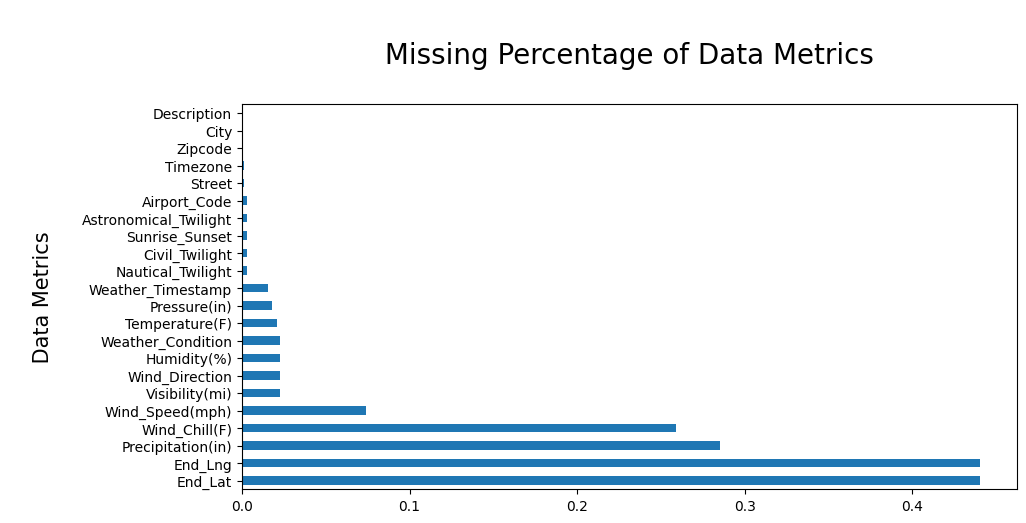

In [6]:
plt.figure(figsize=(10,5))
plt.title('\n Missing Percentage of Data Metrics \n', size=20)
plt.ylabel('\n Data Metrics \n', fontsize=15)
plt.xlabel('\n Missing Percentage\n', fontsize=15)
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage[missing_percentage!=0].plot(kind='barh')

Text(0, 0.5, 'Number of Cases')

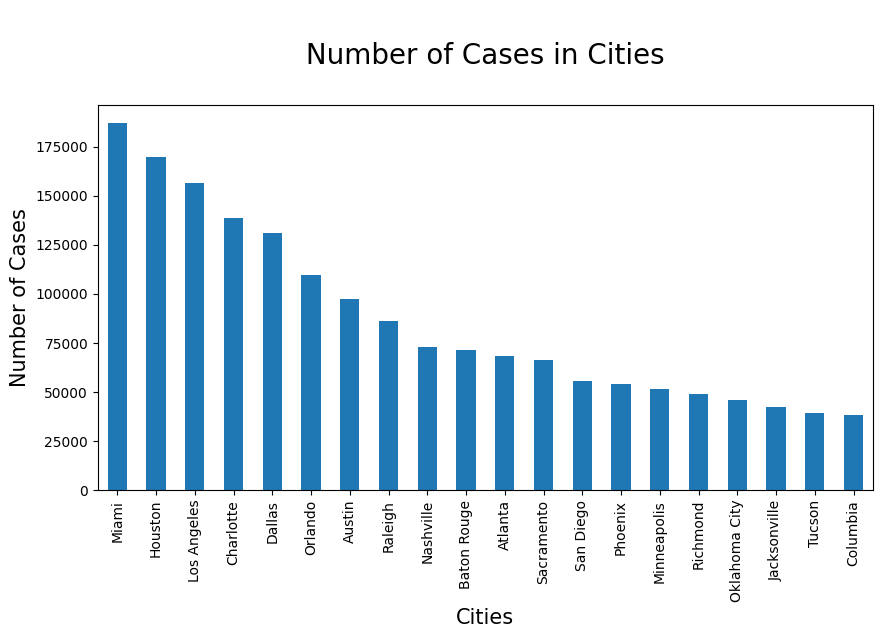

In [7]:
cities_accidents= df.City.value_counts()
ax =cities_accidents[:20].plot(kind='bar',title='\n Number of Cases in Cities \n',
                          figsize=(10,5))
ax.title.set_size(20)
ax.set_xlabel("Cities",fontdict={'fontsize':15})
ax.set_ylabel("Number of Cases",fontdict={'fontsize':15})

In [8]:
"NY" in df.State

False

We don't have car accidents data of New York state.

In [9]:
sns.set_style('darkgrid')
high_accident_cities = cities_accidents[cities_accidents>=1000] 
low_accident_cities = cities_accidents[cities_accidents<1000] 

In [10]:
len(high_accident_cities)/len(cities_accidents)

0.08904810644831115

<Axes: title={'center': '\n Accidents Distribution \n'}, xlabel='\n Number of Accidents\n', ylabel='\n Number of Cities \n'>

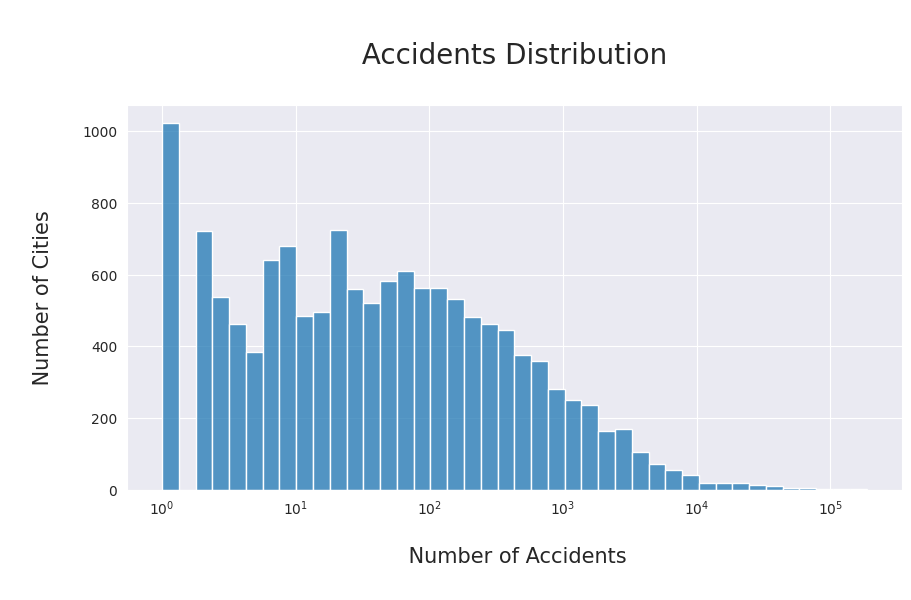

In [11]:
plt.figure(figsize = (10,5))
plt.title('\n Accidents Distribution \n', size=20)
plt.ylabel('\n Number of Cities \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
sns.histplot(cities_accidents,log_scale=True)

<Axes: title={'center': '\n Dangerous Cities Accidents Distribution \n'}, xlabel='\n Number of Accidents\n', ylabel='\n Number of Cities \n'>

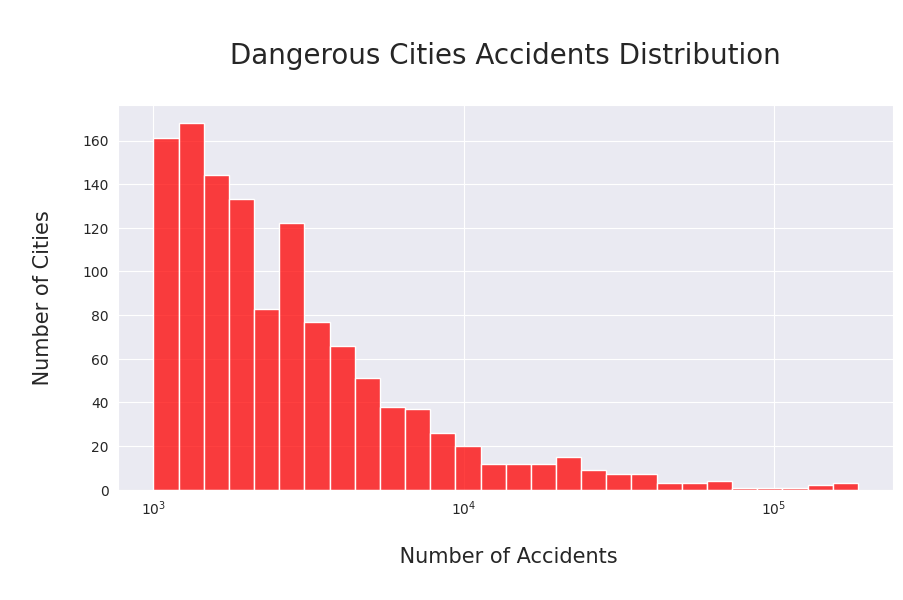

In [12]:
plt.figure(figsize = (10,5))
plt.title('\n Dangerous Cities Accidents Distribution \n', size=20)
plt.ylabel('\n Number of Cities \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
sns.histplot(high_accident_cities,log_scale=True,color='red')

<Axes: title={'center': '\n Safe Cities Accidents Distribution \n'}, xlabel='\n Number of Accidents\n', ylabel='\n Number of Cities \n'>

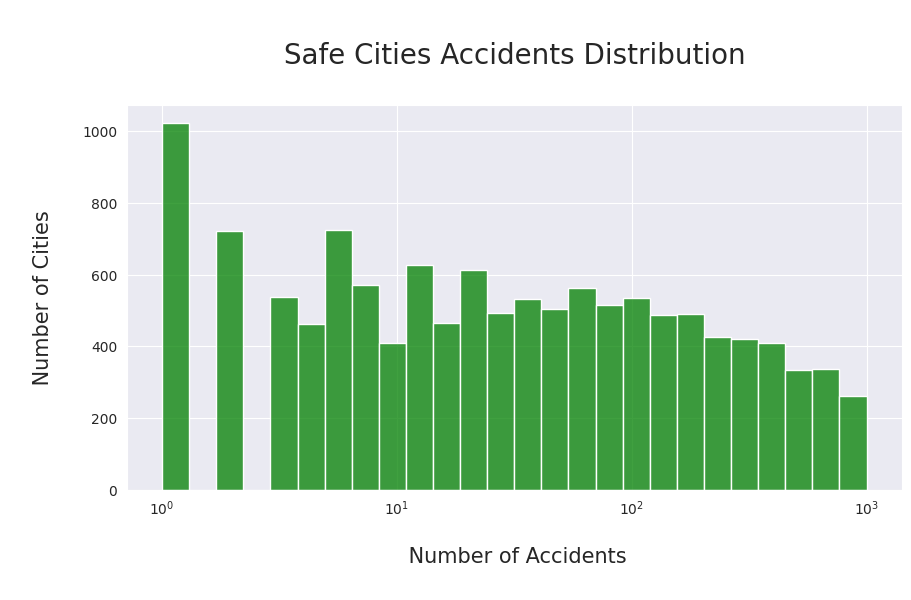

In [13]:
plt.figure(figsize = (10,5))
plt.title('\n Safe Cities Accidents Distribution \n', size=20)
plt.ylabel('\n Number of Cities \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
sns.histplot(low_accident_cities,log_scale=True,color='green')

#### Brief Summary/Documentation
The dataset is a structured and organized dataset with 47 metrics. It's collected continuously, including APIs that provide streaming traffic event data. The parties that capture these data are US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Nearly around 7.7 million accidents were recorded from February 2016 to March 2023. The dataset is about describing environmental types of metrics and geospatial information of the reported US car accidents. Though the dataset may lack some crucial data that's mentioned below, it still has enough credibility.
 
After briefly understanding the dataset, I find out that Miami has the most number of car accidents from Feb 2016- March 2023. However, the dataset does not contain any information about New York City, even being the most populous city in the states. The dataset does not cover the whole year of 2016, so there's a small lack of data. I define the dangerous city as a city that has more than 1000 accidents. Only 5% of all recorded cities in the US are dangerous in terms of the number of car accidents.

I then generated three histplot to see the number of cities that fall in each bin. The reason not to use distplot or kdeplot is to advoid unclear distribution. At first I see how all the accidents distribute, but then I divide it into two groups. Graph with red columns represents the distribution of cities with high number of accidents. Graph with green columns represents the distribution of cities with low number of accidents. However, it is strange to see more than 1000 cities only have 1 accident during those years.



<a id="section-4"></a>
## Process
We will clean the data and extract what we need for the analysis.

Since we are only interested in how environmental factors and COVID-19 periods affect the traffic, We will only keep the following columns: ID, Start_Time, Start_Lat, Start_Lng, City, Temperature(F), Wind_Speed(mph), Humidity(%), Precipitation(in), Visibility(mi), Weather_Condition and drop the remaining columns for cleaner analysis. These other factors also have a large portion being null, so they are not very helpful for the analysis.

The first step is to fill the appropriate values in the columns with Null values. Depending on the distribution and the number of Nulls, I deploy different methods to clean the dataset.

In [14]:
df= df.drop(columns=["End_Time","End_Lat",'End_Lng', 'Distance(mi)', 'Description', 'Street', 'County', 'State', 'Zipcode', 'Country', 'Timezone','Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)', 'Pressure(in)', 'Wind_Direction','Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'])

In [15]:
df.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,7.564541e+06,7.554250e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,6.166329e+01,6.483104e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,1.901365e+01,2.282097e+01,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,4.900000e+01,4.800000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,6.400000e+01,6.700000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,7.600000e+01,8.400000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,2.070000e+02,1.000000e+02,1.400000e+02,1.087000e+03,3.647000e+01


In [16]:
print(df.isnull().sum())

ID                         0
Source                     0
Severity                   0
Start_Time                 0
Start_Lat                  0
Start_Lng                  0
City                     253
Temperature(F)        163853
Humidity(%)           174144
Visibility(mi)        177098
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
dtype: int64


<Axes: title={'center': '\n Distribution of Accidents Temperatue  \n'}, xlabel='\n Temperature(F) \n', ylabel='\n Density \n'>

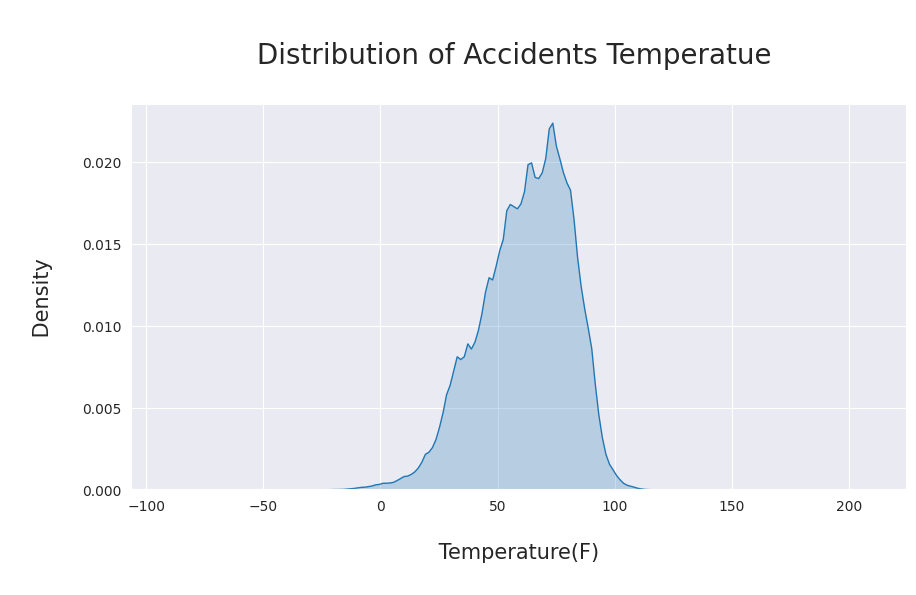

In [17]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Temperatue  \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)
sns.kdeplot(data=df["Temperature(F)"], fill=True)

<Axes: title={'center': '\n Distribution of Accidents Visibility \n'}, xlabel='\n Visibility(mi)\n', ylabel='\n Density \n'>

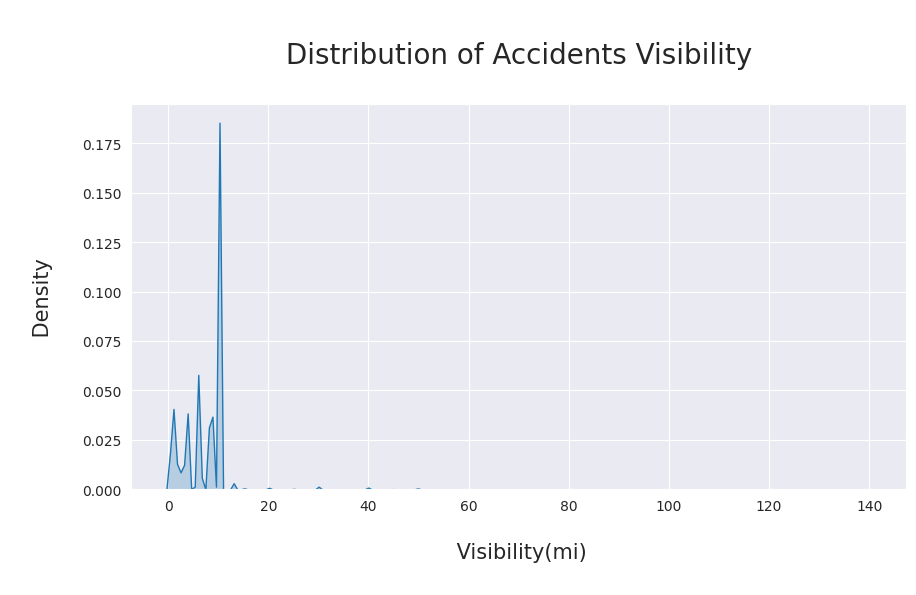

In [18]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Visibility \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Visibility(mi)\n', fontsize=15)
sns.kdeplot(data=df["Visibility(mi)"], fill=True)

Since temperature has less than 10% null values of the total number of values and they appear to be normally distributed. It might be a good idea to fill these empty data with the mean value. Whereas for Visibility(mi), it's right skewed. So replacing null values with a median value is more suitable.

In [19]:
df['Temperature(F)']=df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Visibility(mi)']=df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())

In [20]:
df["Weather_Condition"].value_counts()

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

Since there are 144 types of weather condition and it's hard to differentiate and many of them can be consider as one big category. It's better to drop the column. 

In [21]:
df=df.drop(columns=["Weather_Condition"])

<Axes: title={'center': '\n Distribution of Accidents WindSpeed\n'}, xlabel='\n Wind Speed (mph)\n'>

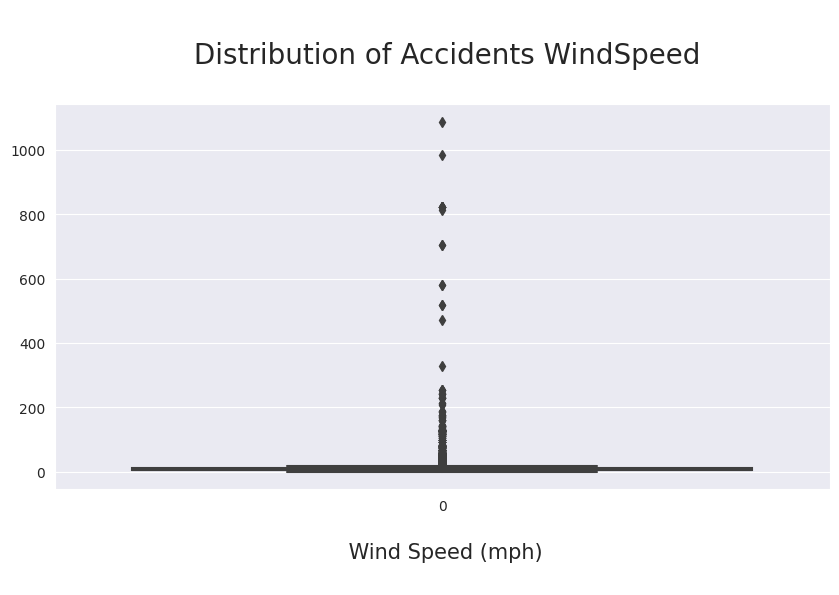

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('\n Distribution of Accidents WindSpeed\n', size=20)
plt.xlabel('\n Wind Speed (mph)\n', fontsize=15)
sns.boxplot(df["Wind_Speed(mph)"])

<Axes: title={'center': '\n Distribution of Accidents Precipitation \n'}, xlabel='\n Precipitation(in) \n', ylabel='\n Density \n'>

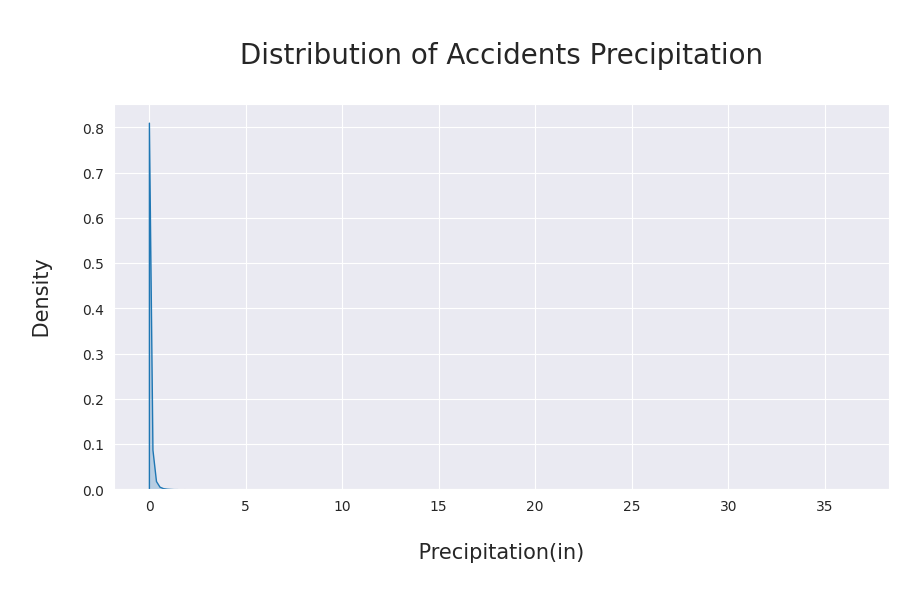

In [23]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Precipitation \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Precipitation(in) \n', fontsize=15)
sns.kdeplot(data=df["Precipitation(in)"], fill=True)

<Axes: title={'center': '\n Distribution of Accidents Humidity \n'}, xlabel='\n Humidity(%) \n', ylabel='\n Density \n'>

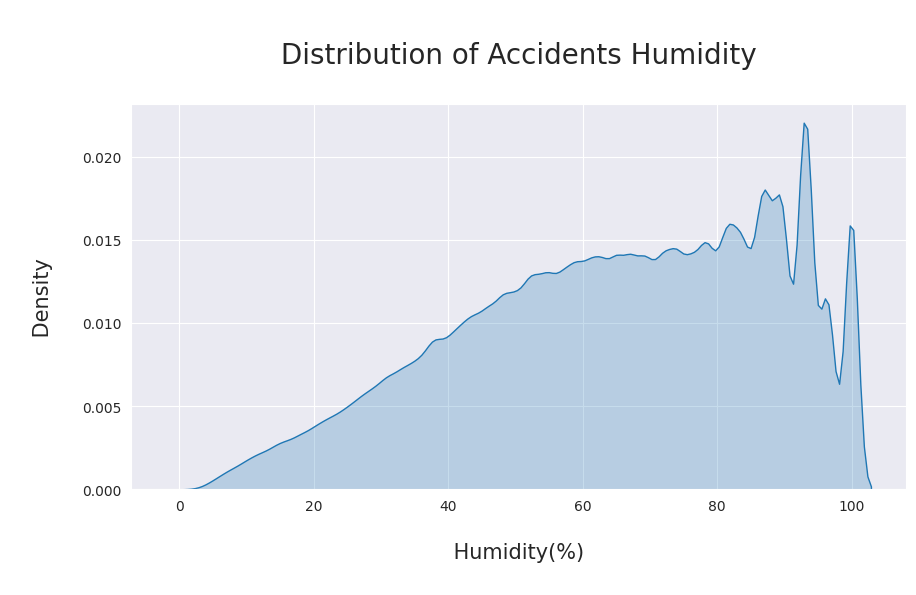

In [24]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Humidity \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Humidity(%) \n', fontsize=15)
sns.kdeplot(data=df["Humidity(%)"], fill=True)

In [25]:
df['Precipitation(in)'].value_counts()
df["Wind_Speed(mph)"].value_counts()
df['Precipitation(in)'].mean() 
df["Wind_Speed(mph)"].isnull().sum() 
df["Precipitation(in)"].isnull().sum() 

2203586

Since Precipitation(in), Wind_Speed(mph) have an right skewed distribution. It's better to use mode value to fill the Null value in these two columns.  Humidity(%) though has a left skwed distribution. I still used the mode value to fill out the Null. It may not be accurate to fill out the Null value based on the previous or latter adjacent value, as every two accidents were hardly related. 

In [26]:
df['Precipitation(in)']=df['Precipitation(in)'].fillna(df['Precipitation(in)'].mode()[0])
df['Wind_Speed(mph)']=df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mode()[0])
df['Humidity(%)']=df['Humidity(%)'].fillna(df['Humidity(%)'].mode()[0])

In [27]:
df = df.dropna(axis=0)

In [28]:
df

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,A-1,Source2,3,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,36.9,91.0,10.0,0.0,0.02
1,A-2,Source2,2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,37.9,100.0,10.0,0.0,0.00
2,A-3,Source2,2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,36.0,100.0,10.0,3.5,0.00
3,A-4,Source2,3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,35.1,96.0,9.0,4.6,0.00
4,A-5,Source2,2,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,36.0,89.0,6.0,3.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,86.0,40.0,10.0,13.0,0.00
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,70.0,73.0,10.0,6.0,0.00
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,73.0,64.0,10.0,10.0,0.00
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,71.0,81.0,10.0,8.0,0.00


#### Brief Summary/Documentation
We find out that there are several factors such as Street, Zipcode have many missing values. In this case, these factors may not be able to contribute many information in our anlaysis. Since we want to find out how different environmental factors may contribute to the severity and potentially finding out which seems to be more responsible for car accidents. I extract only relevant columns. They are Precipitation(in), Wind_Speed(mph), Temperature(F), Visibility(mi), Humidity(%) and Weather_Condition.

When undertanding these various environmental factors, I first check out the distribution of each. Temperature behaves normally while the other three skewed to the right. For each of these columns, the lack of value only counts less than 20% of total number of data. So it's not advisbale to delete the whole rows that may contain Null value. For Weather_Condition, there are 144 kinds of values that describes the weather and the majority of them only has 1 value. So it's not that useful for our data analysis. Finally, we drop the rows that have missing city because it's hard to infer which city this accident belonged to and unfair to contribute all of the 137 missing city accidents to one or two cities.

Now we have cleaned and adjusted our data properly. I will discover the relationship between the factors and the severity of the car accidents and the number of accidents, the impact of covid on car number of accidents (value_counts) geolocation wise and time period wise.

<a id="section-5"></a>
## Analyze
* [Enviornmental Factors Analysis car accidents](#section-10)
* [Time Analysis](#section-11)
* [Location Analysis](#section-12)

<a id="section-10"></a>
### Environmental Factors Analysis

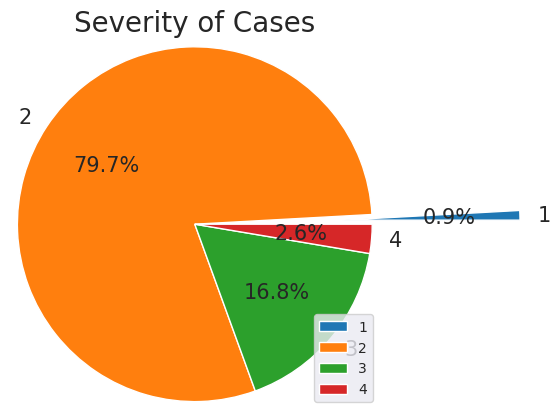

In [29]:
q = "SELECT COUNT(ID) FROM df GROUP BY Severity"
severity_pie = sqldf(q, globals())
severity_pie = severity_pie.squeeze() 
mylabels = ["1", "2", "3", "4"]
plt.title("Severity of Cases",fontsize=20)
plt.pie(severity_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 15},radius=1.2,explode=(1,0,0,0))
plt.legend(mylabels, loc="best")

/tmp/ipykernel_32/4290297074.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["Temperature(F)"],kde=False)


<Axes: title={'center': '\n Case Reported for Temperature \n'}, xlabel='Temperature(F)', ylabel='\n Number of Accidents \n'>

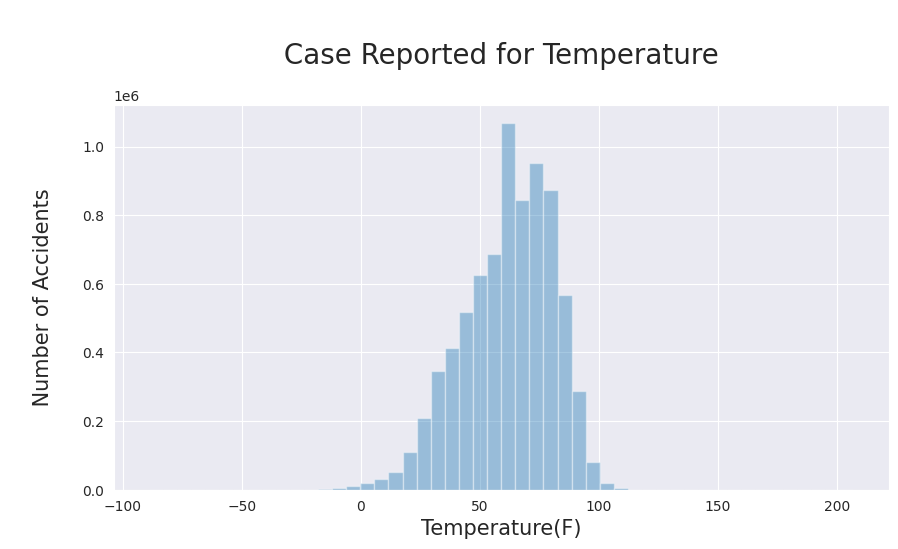

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Case Reported for Temperature \n', size=20)
plt.ylabel('\n Number of Accidents \n', fontsize=15)
plt.xlabel('\n Temperature(F)\n', fontsize=15)
sns.distplot(a=df["Temperature(F)"],kde=False) 

What is the relationship between temperature and the severity of accidents?

<Axes: title={'center': '\n Relationship between Temperature and Severity \n'}, xlabel='\n Severity \n', ylabel='\n Temperature(F) \n'>

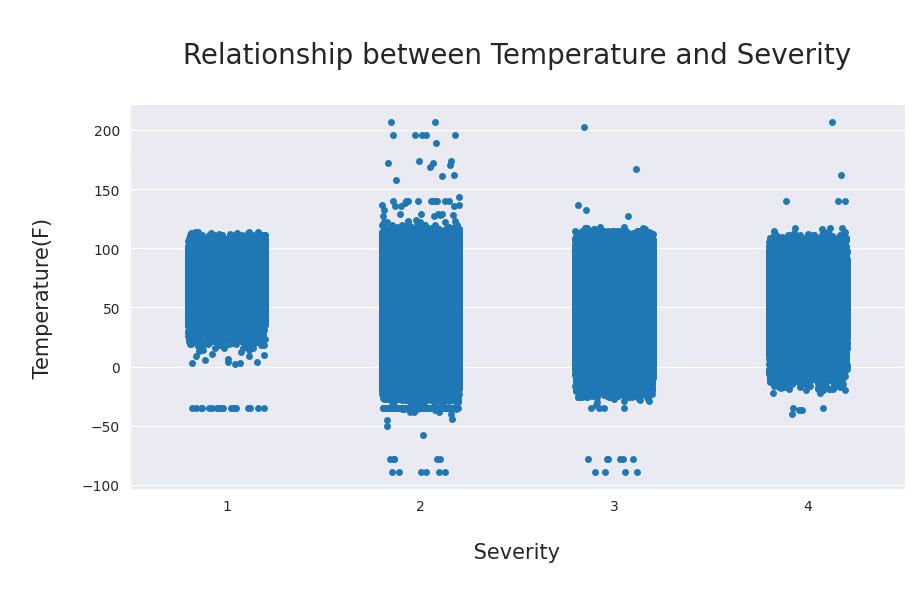

In [31]:
### sns.regplot(x=df_2['Severity'],y=df_2['Temperature(F)'])
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Temperature and Severity \n', size=20)
plt.ylabel('\n Temperature(F) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Temperature(F)'],data=df,jitter=0.2)

/tmp/ipykernel_32/4112173101.py:5: UserWarning: The figure layout has changed to tight
  p.fig.tight_layout()


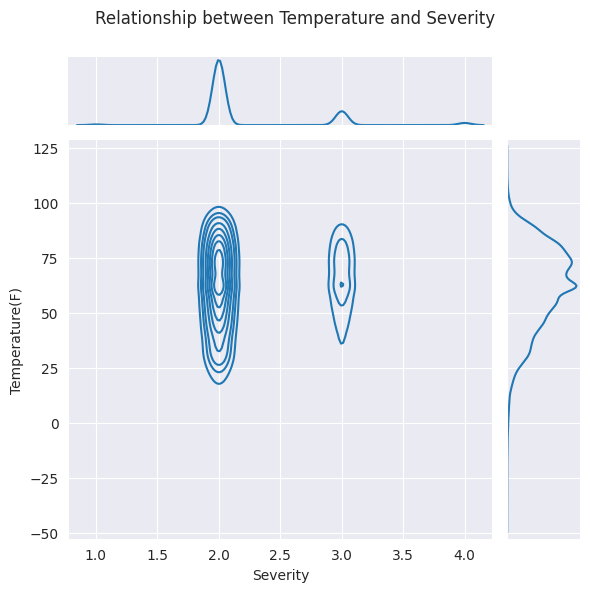

In [32]:
df_2 = df.sample(frac=0.01)
p=sns.jointplot(x=df_2["Severity"],y=df_2["Temperature(F)"],kind='kde')
p.fig.suptitle('Relationship between Temperature and Severity')
p.ax_joint.collections[0].set_alpha(0)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.9)

Do accidents with different severity scores behave the same, temperature wise?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, '\n Temperature(F) \n')

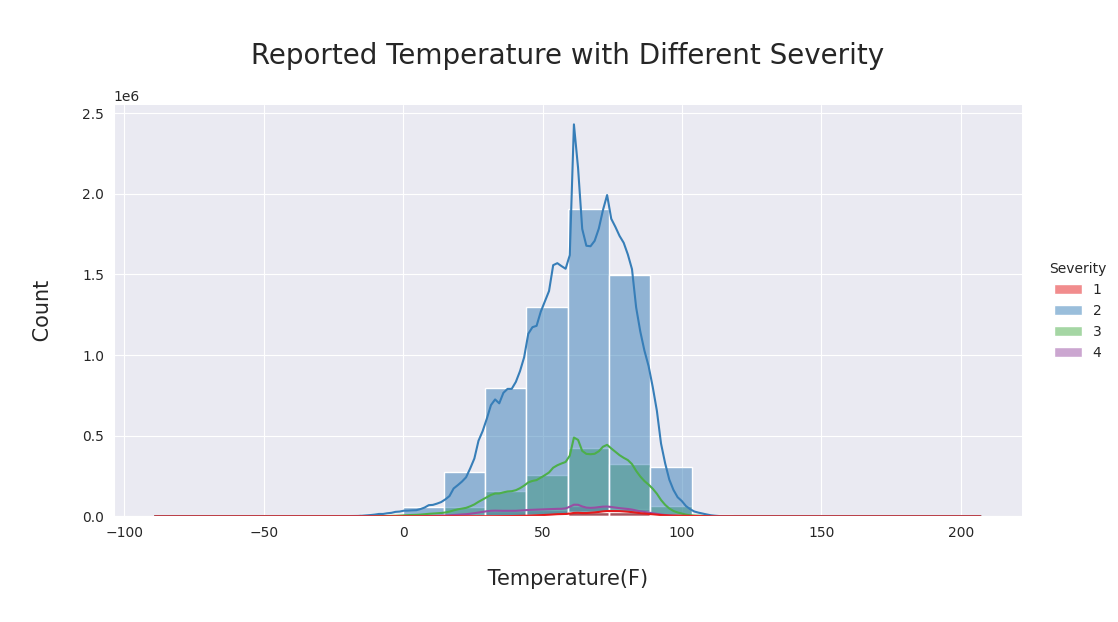

In [33]:
sns.displot(df, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Temperature with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)

<Axes: title={'center': '\n Relationship between Humidity and Severity \n'}, xlabel='\n Severity \n', ylabel='\n Humidity(%) \n'>

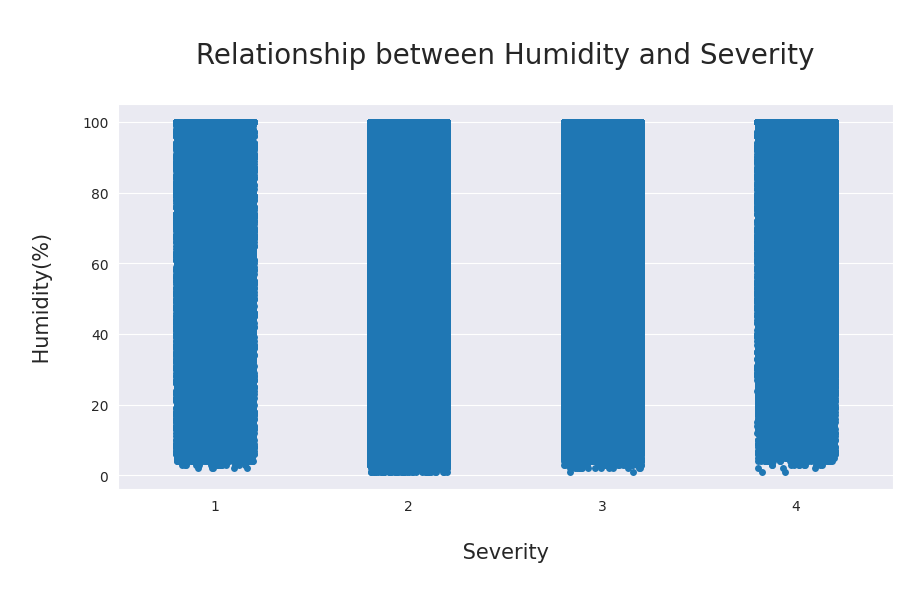

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Humidity and Severity \n', size=20)
plt.ylabel('\n Humidity(%) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Humidity(%)'],data=df,jitter=0.2)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, '\n Humdity(%) \n')

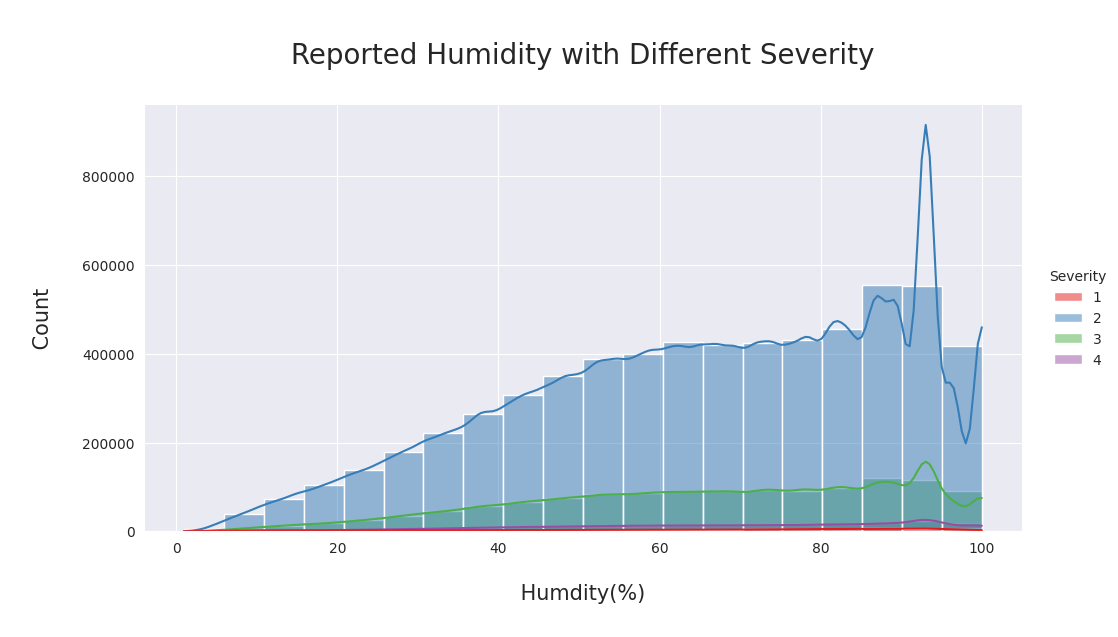

In [35]:
sns.displot(df, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Humidity with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Humdity(%) \n', fontsize=15)

How many cases are there with different visibility? What's the relationship between visibility and severity scors?

<Axes: title={'center': '\n Relationship between Visibility and Severity \n'}, xlabel='\n Severity \n', ylabel='\n Visibility(mi) \n'>

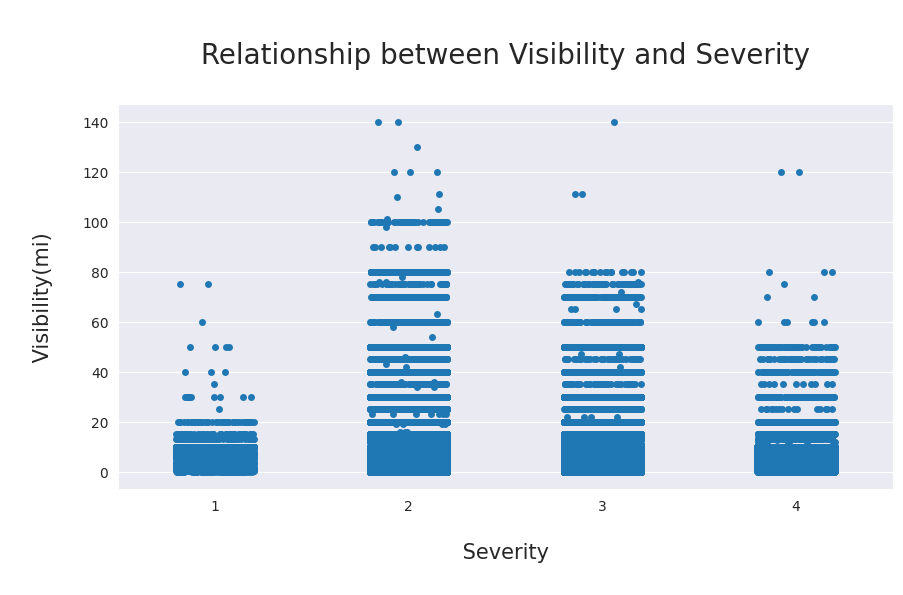

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Visibility and Severity \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Visibility(mi)'],data=df,jitter=0.2)

How many cases are there with different precipitation? What's the relationship between precipitations and severity scors?

<Axes: title={'center': '\n Relationship between Precipitation and Severity \n'}, xlabel='\n Severity \n', ylabel='\n Precipitation(in) \n'>

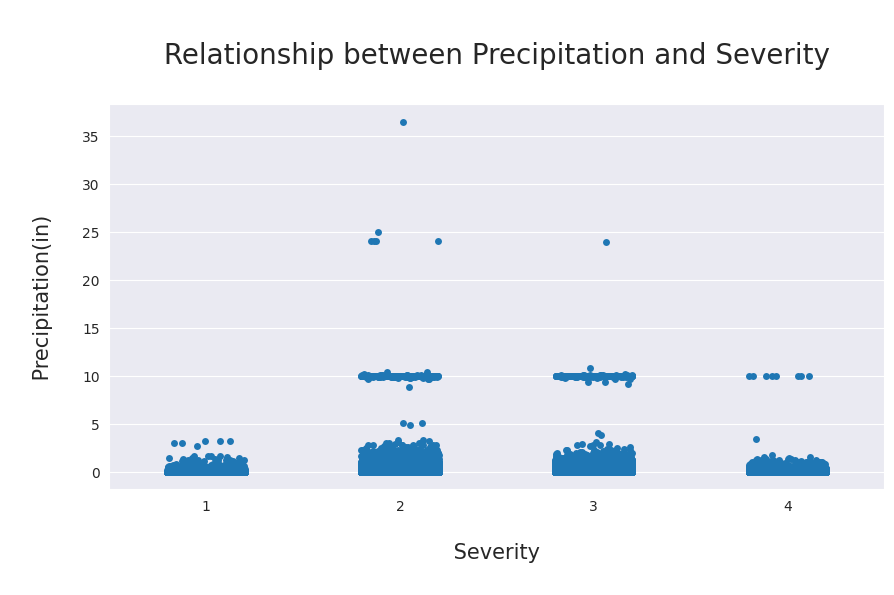

In [37]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Precipitation and Severity \n', size=20)
plt.ylabel('\n Precipitation(in) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Precipitation(in)'],data=df,jitter=0.2)

How many cases are there with different wind speeds? What's the relationship between the wind speed and severity scors?

<Axes: title={'center': '\n Relationship between WindSpeed and Severity \n'}, xlabel='\n Severity \n', ylabel='\n WindSpeed(mph) \n'>

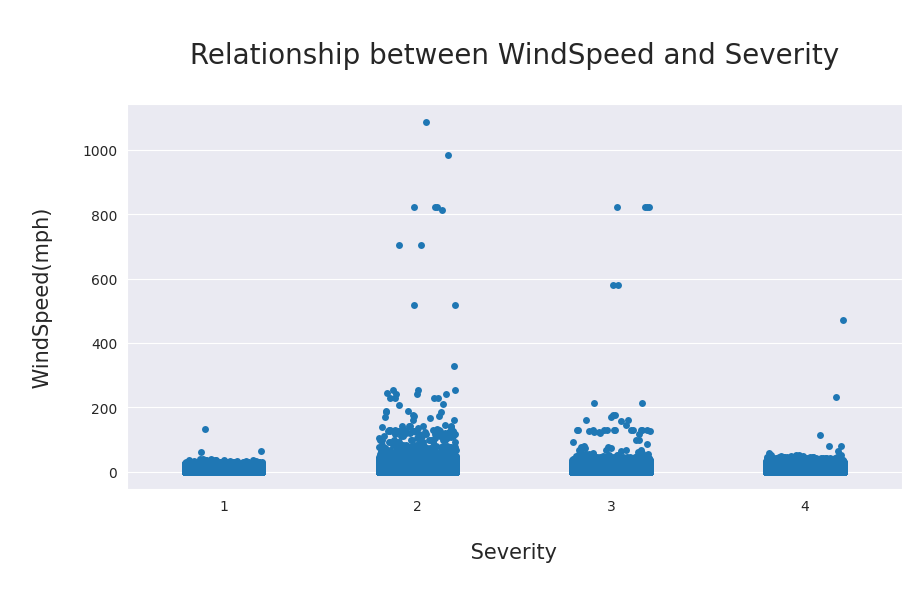

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between WindSpeed and Severity \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Wind_Speed(mph)'],data=df,jitter=0.2)

#### Brief Summary/Documentation
We've just analyzed how different environmental factors might contribute to the number of accidents, how different environmental factors may influence the severity of the accidents. 

I have used pie chart, distplot, stripplot, jointplot, scatterplot, and etc to see the relationship between some environmental factors, severity and number of accidents. More conclusions and findings can be see in the last section.

<a id='section-11'></a>
### Time Analysis: car accidents during the COVID-19 period

In [39]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728141, dtype: object

In [40]:
df.Start_Time= pd.to_datetime(df.Start_Time, format='mixed')

In [41]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728141, dtype: datetime64[ns]

What time of the day have the most accidents?

/tmp/ipykernel_32/3966001747.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour,bins =24,kde=False, norm_hist=True)


<Axes: title={'center': '\n Distribution of Accidents Start Time \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

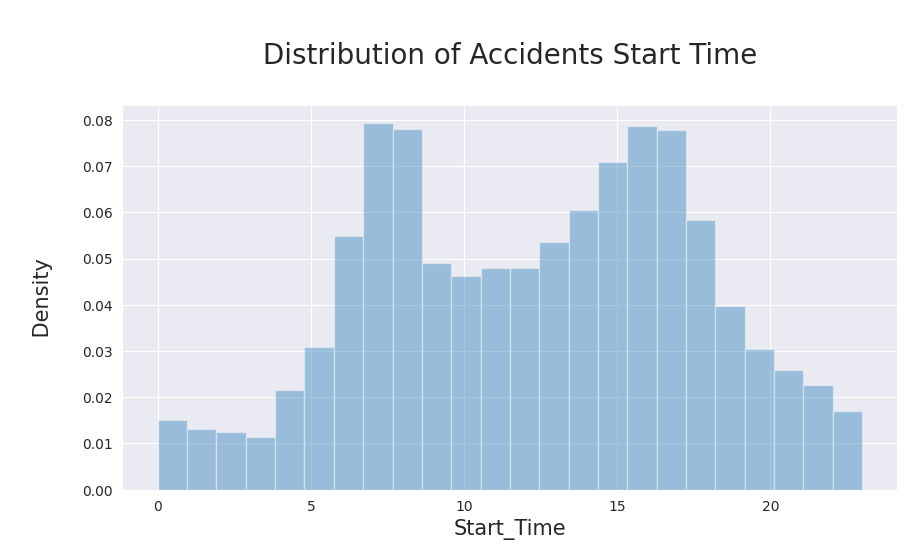

In [42]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Accidents Start Time \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24) \n', fontsize=15)
sns.distplot(df.Start_Time.dt.hour,bins =24,kde=False, norm_hist=True)

A high percentage of accidents occure between 15 to 18. Probably people are hurry to get home. The next highest one is around 6 to 8. This might be due to people going to work.

/tmp/ipykernel_32/291938414.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek,bins =7,kde=False, norm_hist=True)


<Axes: title={'center': '\n Distribution of Accidents Start Day \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

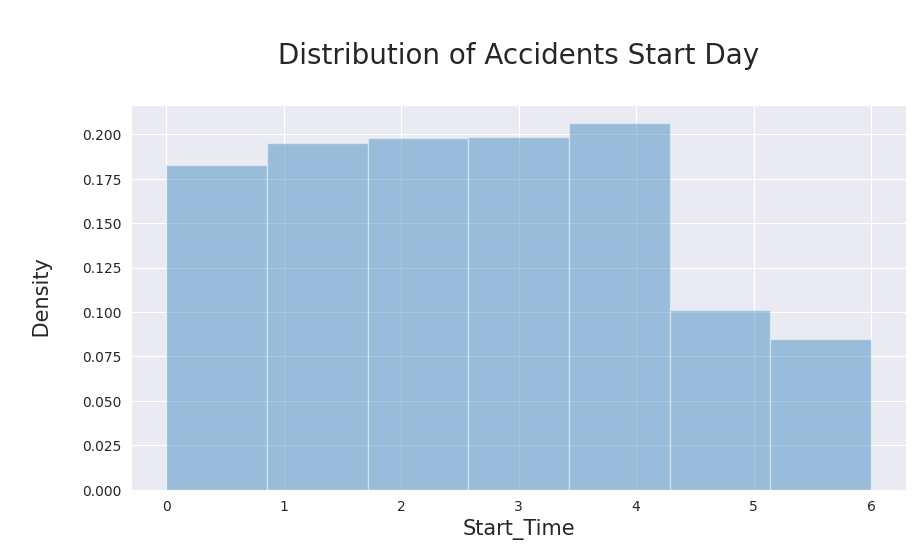

In [43]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Accidents Start Day \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Day) \n', fontsize=15)
sns.distplot(df.Start_Time.dt.dayofweek,bins =7,kde=False, norm_hist=True)

On weekends the number of accidents is lower.
Is the distribution of accidents same on weekdays and on weekends?

/tmp/ipykernel_32/3334407110.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_accidents.dt.hour,bins =24,kde=False, norm_hist=True, color='green')


<Axes: title={'center': '\n Distribution of Sunday Accidents Start Hour \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

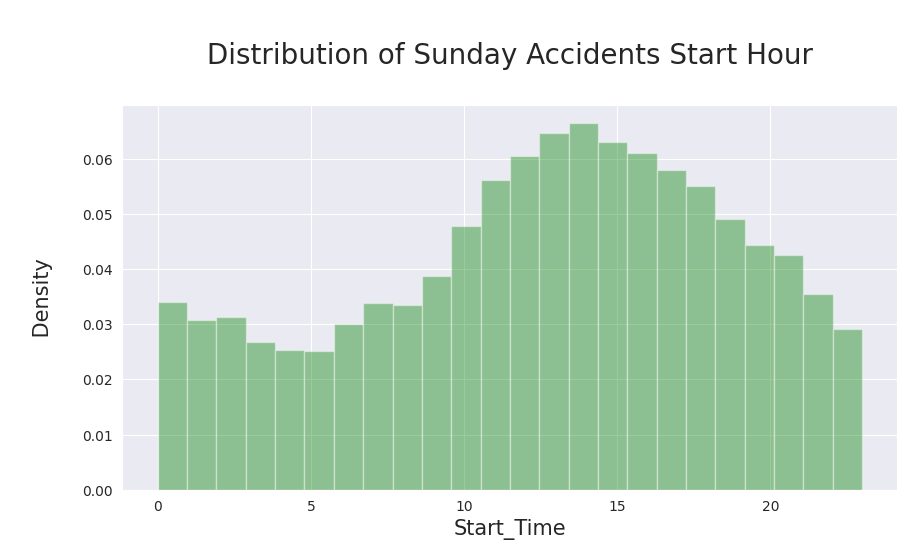

In [44]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Sunday Accidents Start Hour \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24)) \n', fontsize=15)
sundays_accidents= df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sundays_accidents.dt.hour,bins =24,kde=False, norm_hist=True, color='green')

The distribution of Sunday accidents start time is different than the overall start time accidents distribution. Especiallt the density is higher at 0 o'clock for sunday accidents.

/tmp/ipykernel_32/2595191183.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_accidents.dt.hour,bins=24,kde=False,norm_hist=True,color='orange')


<Axes: title={'center': '\n Distribution of Monday Accidents Start Hour \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

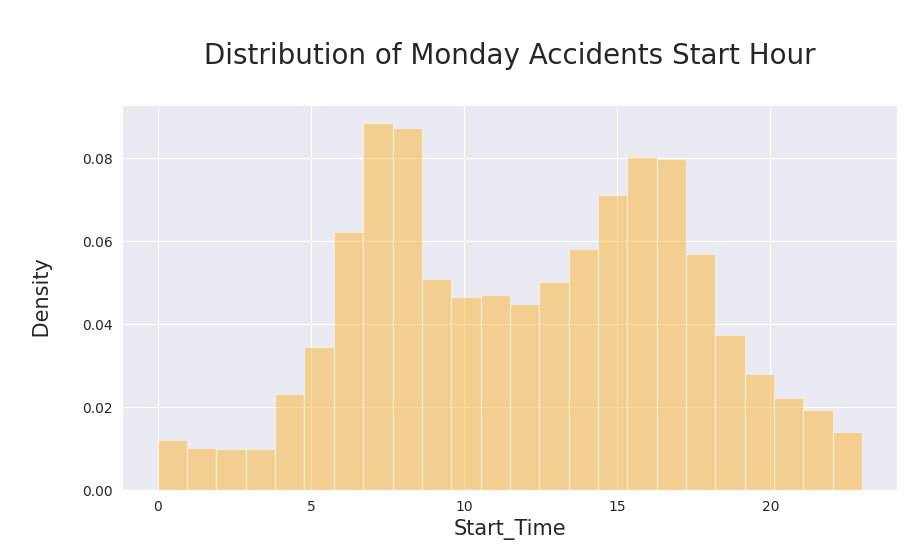

In [45]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Monday Accidents Start Hour \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24) \n', fontsize=15)
monday_accidents=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_accidents.dt.hour,bins=24,kde=False,norm_hist=True,color='orange')

This monday accidents start time distribution is very similar to the overall one. 

In [46]:
# collect each year's number of incidents to see the overall trend of year accidents
year_data= pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index":"Year","Start_Time":"Accident_Cases"})
year_data

,Accident_Cases,count
0,2022,1762387
1,2021,1563700
2,2020,1178863
3,2019,954284
4,2018,893416
5,2017,718066
6,2016,410794
7,2023,246631


In [47]:
year_month = df["Start_Time"].groupby(df.Start_Time.dt.to_period("M")).agg('count').reset_index(name='Num_Accidents')
year_month

,Start_Time,Num_Accidents
0,2016-01,7
1,2016-02,985
2,2016-03,6330
3,2016-04,18088
4,2016-05,17609
...,...,...
82,2022-11,130957
83,2022-12,188902
84,2023-01,160912
85,2023-02,55532


/tmp/ipykernel_32/3540436964.py:6: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=year_month, x=year_month.Start_Time.dt.month, y=year_month.Num_Accidents, hue=year_month.Start_Time.dt.year,


<Axes: title={'center': 'Number of Accidents of 2016-2023 by Months'}, xlabel='Month', ylabel='Number of Accidents'>

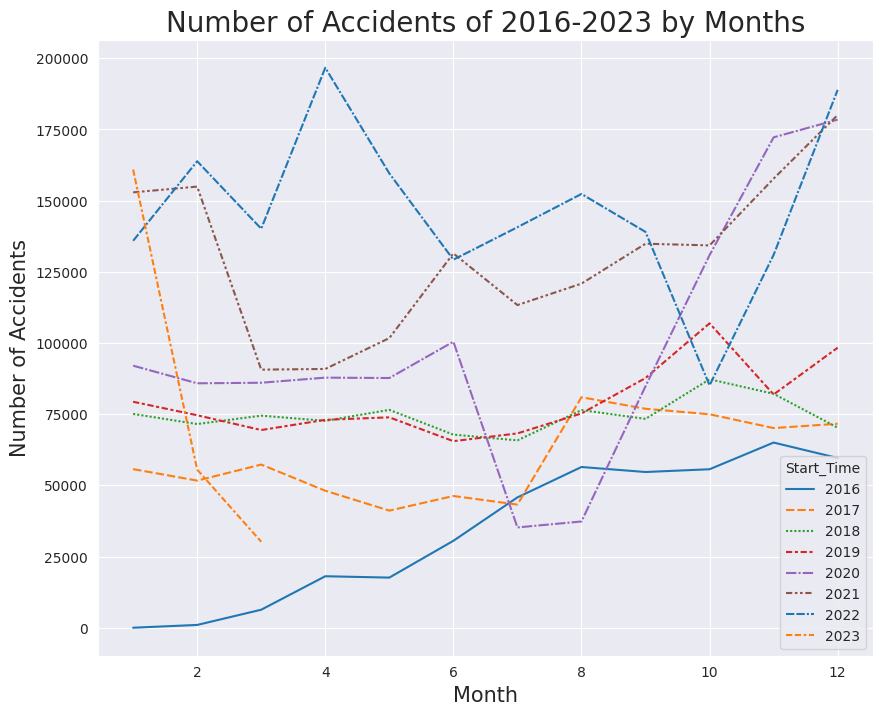

In [48]:
palette = sns.color_palette("tab10", 6)
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Number of Accidents",fontsize=15)
plt.title('Number of Accidents of 2016-2023 by Months',size=20)
sns.lineplot(data=year_month, x=year_month.Start_Time.dt.month, y=year_month.Num_Accidents, hue=year_month.Start_Time.dt.year,
             style=year_month.Start_Time.dt.year, palette=palette)

We see there's a rising number of car accidents in 2020 and 2021 (even 2022)-(Covid-19 period) But is it due to the environmental factors? We may need to have more data related to the number of positive cases, government policies etc. But we could check out the yearly environmental influence.

<Axes: title={'center': 'Temperature Variation of 2016-2023 by Months'}, xlabel='Month', ylabel='Temperature level'>

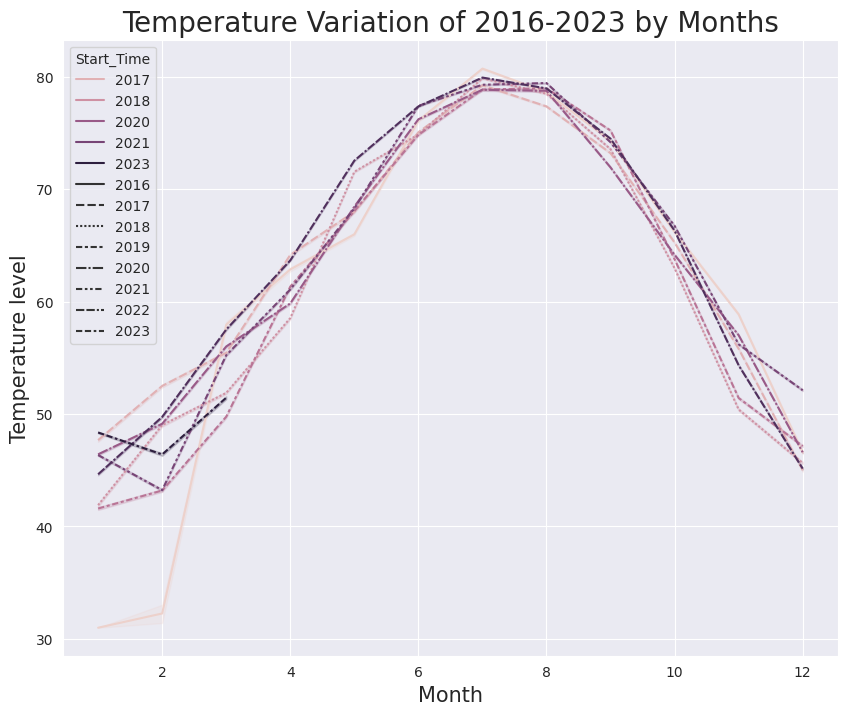

In [49]:
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Temperature level",fontsize=15)
plt.title('Temperature Variation of 2016-2023 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Temperature(F)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year)

/tmp/ipykernel_32/1509963711.py:6: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Humidity(%)"], hue=df.Start_Time.dt.year,


<Axes: title={'center': 'Humidity Variation of 2016-2023 by Months'}, xlabel='Month', ylabel='Humidity level'>

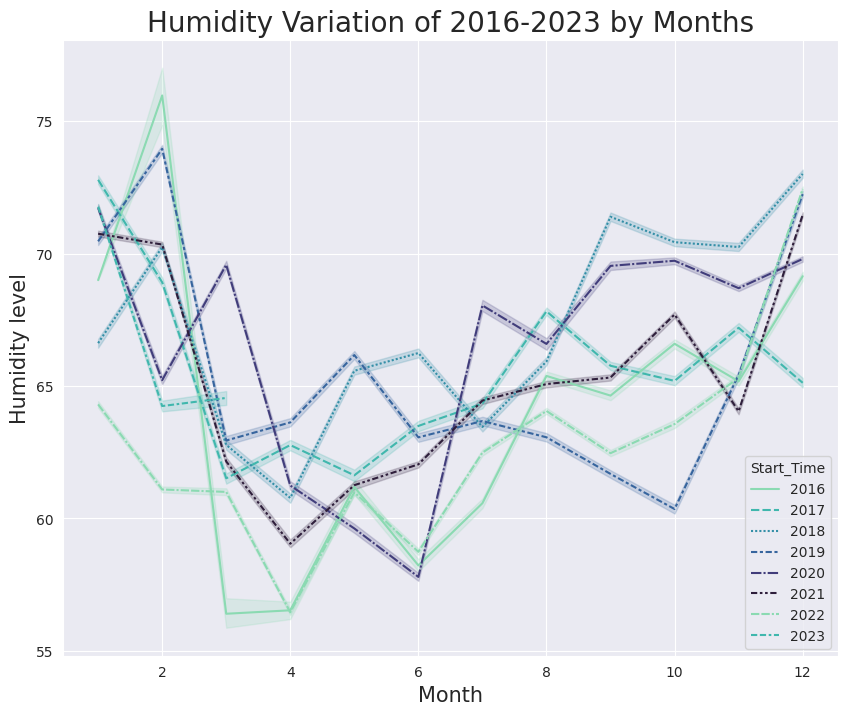

In [50]:
plt.figure(figsize = (10,8))
palette= sns.color_palette("mako_r",6)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Humidity level",fontsize=15)
plt.title('Humidity Variation of 2016-2023 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Humidity(%)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year,palette=palette)

/tmp/ipykernel_32/2794134619.py:6: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Precipitation(in)"], hue=df.Start_Time.dt.year,


<Axes: title={'center': 'Precipitation Variation of 2016-2023 by Months'}, xlabel='Month', ylabel='Precipitation level'>

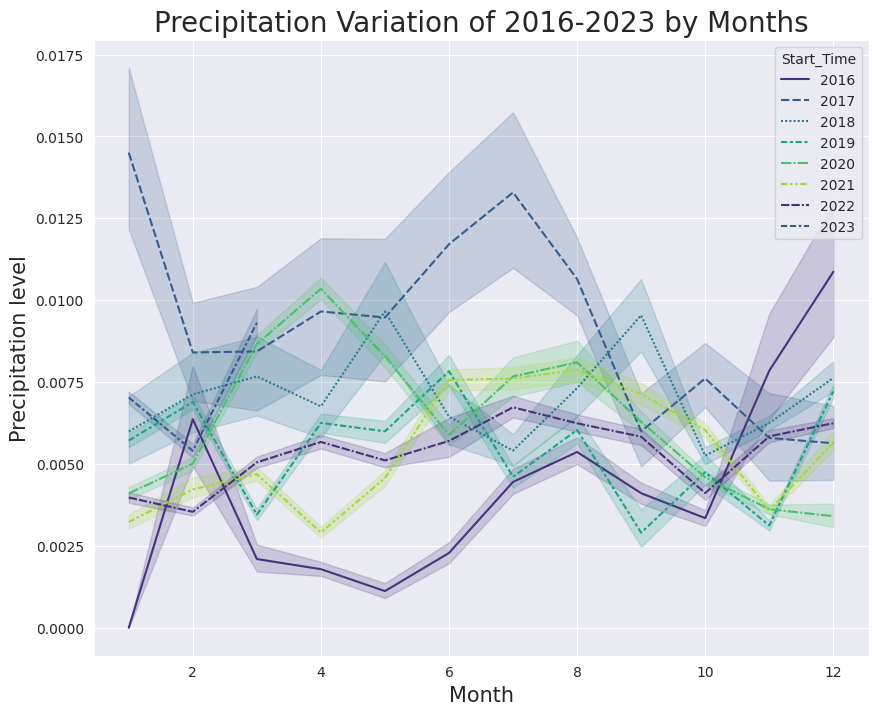

In [51]:
plt.figure(figsize = (10,8))
palette = sns.color_palette("viridis", 6)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Precipitation level",fontsize=15)
plt.title('Precipitation Variation of 2016-2023 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Precipitation(in)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year,palette=palette)

It seems like Precipitation level of every year varies drastically. 2017 has the overall highest precipitation level, whereas 2016 has the relatively low precipitation level. 2022 has the middle level of precipitation.

We also want to know if the start time of the accidents has change each of every year. During covid, the majority of jobs become work-from-home mode. Therefore, this new mode of working might have some impact on the number of accidents. Let's value count the number of accidents by start time per year in a new data frame.

In [52]:
start_time_acc= df.groupby([df.Start_Time.dt.year,df.Start_Time.dt.hour]).count()
start_time_acc.index.names=['year','hour']
start_time_acc = start_time_acc.reset_index()
start_time_acc

,year,hour,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2016,0,4321,4321,4321,4321,4321,4321,4321,4321,4321,4321,4321,4321
1,2016,1,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465,3465
2,2016,2,3352,3352,3352,3352,3352,3352,3352,3352,3352,3352,3352,3352
3,2016,3,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454,3454
4,2016,4,5311,5311,5311,5311,5311,5311,5311,5311,5311,5311,5311,5311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023,19,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685
188,2023,20,7757,7757,7757,7757,7757,7757,7757,7757,7757,7757,7757,7757
189,2023,21,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026
190,2023,22,5963,5963,5963,5963,5963,5963,5963,5963,5963,5963,5963,5963


/tmp/ipykernel_32/3379538655.py:6: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=start_time_acc, x=start_time_acc['hour'], y=start_time_acc.ID,


<Axes: title={'center': 'The Start Time of Accidents from 2016-2021 by Months'}, xlabel='Time: hour of Accidents', ylabel='Number of Accidents'>

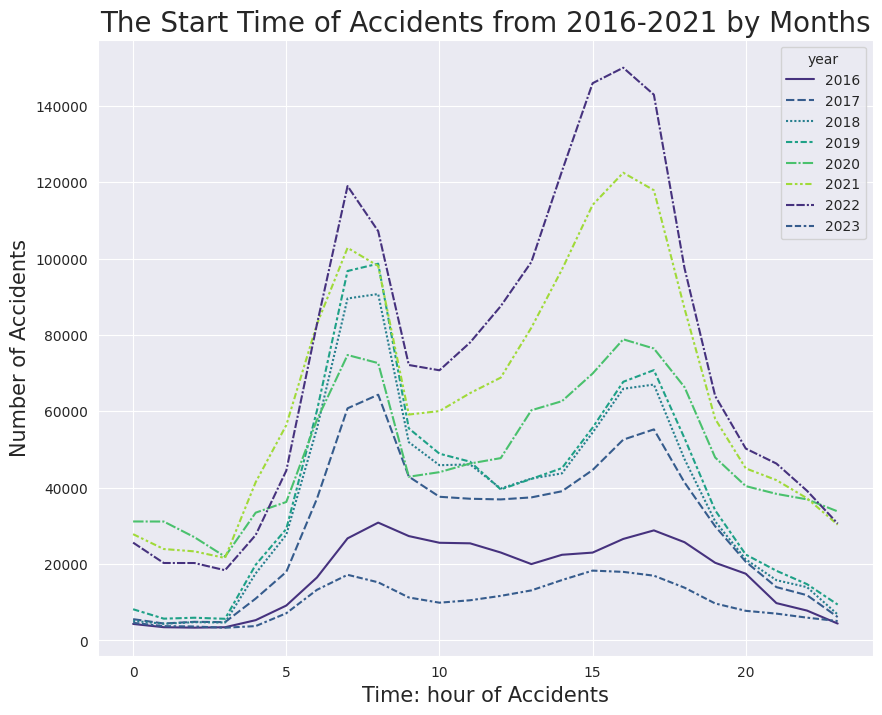

In [53]:
plt.figure(figsize = (10,8))
palette = sns.color_palette("viridis", 6)
plt.xlabel("Time: hour of Accidents",fontsize=15)
plt.ylabel("Number of Accidents",fontsize=15)
plt.title('The Start Time of Accidents from 2016-2021 by Months',size=20)
sns.lineplot(data=start_time_acc, x=start_time_acc['hour'], y=start_time_acc.ID,
             hue=start_time_acc.year,style=start_time_acc.year,palette=palette)
# Notice: the Start_Time now only contains HOUR

In [54]:
df[df['Start_Time'].dt.year==2023].value_counts()

ID         Source   Severity  Start_Time           Start_Lat  Start_Lng    City             Temperature(F)  Humidity(%)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)
A-3650461  Source1  2         2023-03-31 17:09:16  45.676472  -94.174568   Sauk Rapids      33.0            89.0         3.0             17.0             0.05                 1
A-4777517  Source1  2         2023-02-23 02:02:00  32.618325  -83.652290   Warner Robins    67.0            94.0         10.0            10.0             0.00                 1
A-4776712  Source1  2         2023-01-31 09:20:37  39.245342  -84.366106   Cincinnati       24.0            75.0         10.0            8.0              0.00                 1
A-4776723  Source1  2         2023-01-17 07:48:00  34.246589  -117.436812  San Bernardino   45.0            81.0         10.0            0.0              0.00                 1
A-4776731  Source1  2         2023-01-31 05:53:00  37.752622  -121.467199  Tracy            32.0            64.0        

I find out that 2022 still has the most number of accidents at every hour. Nevertheless, this may not reflect the reality because 2022 has siginificantly more reported accidents than in 2016 or previous year. Interestingly, the pattern of each year looks almost identical. Each year's line is just higher than the previous one (except the last year).

<a id='section-12'></a>
### Location Analysis

In [55]:
import folium
from folium.plugins import HeatMap
sample_df= df.sample(int(0.001*len(df)))
lat_lng_pairs= list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))
map= folium.Map([38.552397, -96],zoom_start=6, min_zoom = 5, max_zoom = 13)
HeatMap(lat_lng_pairs).add_to(map)
map

Above is another interesting map that shows where car accidents occur more frequently. Indeed, if we locate to New York City, we don't have any data to show. If we locate to Miami and Los angeles, the number of car accidents is high. East and west coast have the highest number of car accidents, whereas the middle of the states are relatively more 'safe.'

This map may not be able to tell much things about the COVID-19 though.

<a id="section-7"></a>
## Act
### Findings
* New York State car accidents data is not included in the dataset.
* Miami is the city with the most number of car accidents.
* The Temperature is almost normally distributed.
* Wind Speed, Visibility, Precipitation all follow a right skewed distribution.
* Humidity on the other hand follows a left skewed distribution.
* There are 144 types of weather condition in the dataset.
* Temperature does not have much of an impact on the severity of the accident. However, extreme weather temperature, like below -50 F degree, usually only causes accidents that have a severity score of 2.
* Car accidents are most likely to happen at the temperature around 50-80 F degree. 
* Severe car accidents are mostly accompanied with a low visibility (below 50 mi). Meanwhile, The least severe car accidents tend to have the poorest visibility (below 20 mi).
* Precipitation and the number of accidents have a simple inverse relationship. The heavier the rain, the fewer the number of car accidents.
* Precipitation does not affect the severity of the accidents as much as the previous factors. However, during heavy rain(25inch), accidents mostly have a severity score of 2.
* Wind Speed affects the severity of the accidents almost equally.
* High wind speed, above 20mph, accompanies with 0 reported car accidents. Low wind speed, below 20 mph, accompanies with more car accidents as it decreases.
* A high percentage of accidents occur between 15 to 18. Probably people’r hurry to get home. The next highest one is around 6 to 8.
* On weekends the number of accidents happened at 0 o’clock is higher than weekdays’.
* Weekday accidents distribution is almost the same as the overall accidents distribution.
* For every year from 2016-2023, the number of reported car accidents increases. 2022 has the most number of car accidents.
* Temperature of accident trends of every year are stable.
* 2017 being the year has the most precipitation.
* 2022 still has the most number of accidents at every hour.reported accidents than in 2016 or previous year. Interestingly, the pattern of each year looks almost identical. Each year's line is just higher than the previous one.
* During covid 19 months, the number of car accidents has increased significantly. Feb 2020 is the start of COVID.
* During covid 19 months, though most jobs become work from home. The number of car accidents happened at every hour has the same pattern as previous years though much higher.
* Cities with the most Covid-19 cases have more car accidents.

### Answers to the hypothesis
* Cold weathers does not have a strong relation with the number of traffics. Moderate temperatures, 50-80F, correspond with high number of accidents. Extreme weather temperature, higher than 90 or lower than -50, do result in more severe accidents.
* Low visibility (<5mi) has a strong relation with the number of accidents. Low visibility affects the severity of accidents almost equally, no matter what the severity score is.
* A high precipitation level does not cause more accidents. People may stay at indoors more often when rains are heavy. A high precipitation does cause more severe accidents more often.
* A high wind speed does not cause more accident. People may stay at indoors more often when winds are strong. A high wind speed does cause more sever accidents more often.
* No matter what the humility level is, it does not hava a strong relation with the severity of accidents. Though most of the reported accidents due to humility have a severity score of 2.
* COVID-19 could have some impacts on the increased number of car accidents. Nevertheless, the increased number of car accidents might be due to other factors that are not shown in the dataset. During this COVID-19 period, many factors could account for the increased number of car accidents. COVID-19 is just one of the explanations.
During the COVID-19 period, starting from Feb 2020, the number of car accidents increase so much faster and higher than previous years. Since the temperature and humidity level do follow very similar trends across the years, the number of increased car accidents should not be due to these two environmental factors. The precipitation level varies yearly drastically, so it may have some minimal impact on number of car accidents during the COVID-19 period. During the COVID-19 period, people work from home, but the number of accidents at every hour in 2021 is still the highest, so the working from home mode does not decrease the number of car accidents during this COVID-19 period.

At the conclusion of this work, normal hypothesis tests will be conducted to gain further insights into the factors influencing traffic accidents in the USA.

#### Hypothesis : The Average Severity of Car Accidents in the USA is above 2.5

In [66]:
p = {}  

# Define the null and alternative hypotheses
null_hypothesis = "The average severity of car accidents in the USA is 2.5 or lower."
alternative_hypothesis = "The average severity of car accidents in the USA is above 2.5."

# Assuming you have a dataset with a 'Severity' column (replace 'data' with your actual data)
sample_data = df['Severity']

# Perform a one-sample t-test
from scipy import stats
t_stat, p_value = stats.ttest_1samp(sample_data, popmean=2.5)

# Store results in the dictionary
p['null_hypothesis'] = null_hypothesis
p['alternative_hypothesis'] = alternative_hypothesis
p['sample_data_mean'] = sample_data.mean()
p['t_statistic'] = t_stat
p['p_value'] = p_value

# Function to determine whether to accept or reject the null hypothesis
def hypothesis_accepted(p):
    if p['p_value'] < 0.05:
        return 'alternative'
    else:
        return 'null'

p['hypothesis_accepted'] = hypothesis_accepted(p)

# Display the results
print("Results for Hypothesis Test 1:")
print("Null Hypothesis:", null_hypothesis)
print("Alternative Hypothesis:", alternative_hypothesis)
print("Sample Data Mean:", p['sample_data_mean'])
print("T-Statistic:", p['t_statistic'])
print("P-Value:", p['p_value'])
print("Hypothesis Accepted:", p['hypothesis_accepted'])

Results for Hypothesis Test 1:
Null Hypothesis: The average severity of car accidents in the USA is 2.5 or lower.
Alternative Hypothesis: The average severity of car accidents in the USA is above 2.5.
Sample Data Mean: 2.212384970719349
T-Statistic: -1640.021871231594
P-Value: 0.0
Hypothesis Accepted: alternative


Reject hypothesis : doesn't really work because the variance of the data is very low.

#### Hypothesis, the average distance that an accident affects the road would be one mile. 

In [69]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [70]:
p = {}  

# Define the null and alternative hypotheses
null_hypothesis = "The average distance that an accident affects the road is one mile or less."
alternative_hypothesis = "The average distance that an accident affects the road is more than one mile."

# Assuming you have a dataset with a 'Distance(mi)' column (replace 'data' with your actual data)
sample_data = df['Distance(mi)']

# Perform a one-sample t-test
from scipy import stats
t_stat, p_value = stats.ttest_1samp(sample_data, popmean=1)

# Store results in the dictionary
p['null_hypothesis'] = null_hypothesis
p['alternative_hypothesis'] = alternative_hypothesis
p['sample_data_mean'] = sample_data.mean()
p['t_statistic'] = t_stat
p['p_value'] = p_value

# Function to determine whether to accept or reject the null hypothesis
def hypothesis_accepted(p):
    if p['p_value'] < 0.05:
        return 'alternative'
    else:
        return 'null'

p['hypothesis_accepted'] = hypothesis_accepted(p)

# Display the results
print("Results for Hypothesis Test 2:")
print("Null Hypothesis:", null_hypothesis)
print("Alternative Hypothesis:", alternative_hypothesis)
print("Sample Data Mean:", p['sample_data_mean'])
print("T-Statistic:", p['t_statistic'])
print("P-Value:", p['p_value'])
print("Hypothesis Accepted:", p['hypothesis_accepted'])

Results for Hypothesis Test 2:
Null Hypothesis: The average distance that an accident affects the road is one mile or less.
Alternative Hypothesis: The average distance that an accident affects the road is more than one mile.
Sample Data Mean: 0.5618422831523752
T-Statistic: -685.5418229790475
P-Value: 0.0
Hypothesis Accepted: alternative


Reject hypothesis, average accident distance is less than one mile